In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV

In [3]:
preprocessed_data = pd.read_csv('data_preprocessed.csv')

In [4]:
preprocessed_data.shape

(109248, 17)

In [5]:
preprocessed_data=preprocessed_data.iloc[:50000,:]


In [6]:
preprocessed_data.shape

(50000, 17)

# Splitting data into X & Y

In [7]:
y = preprocessed_data['project_is_approved'].values
x = preprocessed_data.drop(['project_is_approved'], axis=1)
x.head(1)

,Unnamed: 0,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,price,quantity,titles_word_count,essays_word_count,project_year_month,preprocessed_titles,preprocessed_essays,preprocessed_res_summary
0,0,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,grades_prek_2,literacy_language,"esl, literacy",0,154.6,23,7,272,16-12,educational support for english learners at home,my students are english learners that are work...,my students need opportunities to practice beg...


# Splitting data into Train & Test data (No need for sep. CV because we are doing N-fold Grid Search CV)

In [8]:
print(y)
print(type(y))
y.size

[0 1 0 ... 1 1 1]
<class 'numpy.ndarray'>


50000

In [9]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.33, stratify=y)

print(y_tr.size)
print(y_te.size)
print(x_tr.shape)
print(x_te.shape)

33500
16500
(33500, 16)
(16500, 16)


# Featurization of Essay, Project_title, Project Summary using BoW

In [10]:
def bow(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [11]:
#Essays featurization
vectorizer = CountVectorizer(min_df=20,ngram_range=(1,3))
(x_tr_essay_bow, x_te_essay_bow) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_bow.shape)
print("x_test essays matrix dimensions", x_te_essay_bow.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_bow, x_te_title_bow) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_bow.shape)
print("x_test titles matrix dimensions", x_te_title_bow.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_bow, x_te_res_summary_bow) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_bow.shape)
print("x_test titles matrix dimensions", x_te_res_summary_bow.shape)

x_train essays matrix dimensions (33500, 91501)
x_test essays matrix dimensions (16500, 91501)
x_train titles matrix dimensions (33500, 9698)
x_test titles matrix dimensions (16500, 9698)
x_test titles matrix dimensions (33500, 13746)
x_test titles matrix dimensions (16500, 13746)


# Featurization of Essay, Project_title, Project Summary using tf-idf

In [29]:
def tfidf(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_bow = vectorizer.transform(x_train)
    x_test_bow = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [30]:
#Essays featurization
vectorizer = TfidfVectorizer(min_df=20,ngram_range=(1,3))
(x_tr_essay_tfidf, x_te_essay_tfidf) = bow (vectorizer, x_tr['preprocessed_essays'].values, x_te['preprocessed_essays'].values)
print("x_train essays matrix dimensions", x_tr_essay_tfidf.shape)
print("x_test essays matrix dimensions", x_te_essay_tfidf.shape)

#Titles featurization
vectorizer = CountVectorizer()
(x_tr_title_tfidf, x_te_title_tfidf) = bow (vectorizer, x_tr['preprocessed_titles'].values, x_te['preprocessed_titles'].values)

print("x_train titles matrix dimensions", x_tr_title_tfidf.shape)
print("x_test titles matrix dimensions", x_te_title_tfidf.shape)

#Resource Summaries
vectorizer = CountVectorizer()
(x_tr_res_summary_tfidf, x_te_res_summary_tfidf) = bow (vectorizer, x_tr['preprocessed_res_summary'].values, x_te['preprocessed_res_summary'].values)

print("x_test titles matrix dimensions", x_tr_res_summary_tfidf.shape)
print("x_test titles matrix dimensions", x_te_res_summary_tfidf.shape)

x_train essays matrix dimensions (33500, 91501)
x_test essays matrix dimensions (16500, 91501)
x_train titles matrix dimensions (33500, 9698)
x_test titles matrix dimensions (16500, 9698)
x_test titles matrix dimensions (33500, 13746)
x_test titles matrix dimensions (16500, 13746)


# Featurization of Categorical features

In [12]:
def ohe(vectorizer, x_train, x_test):
    vectorizer.fit(x_train)

    x_train_ohe = vectorizer.transform(x_train)
    x_test_ohe = vectorizer.transform(x_test)
    return (x_train_bow, x_test_bow)

In [13]:
vectorizer = CountVectorizer()

# Project_subject_categories
(x_tr_subjects_ohe, x_te_subjects_ohe) = bow (vectorizer, x_tr['project_subject_categories'].values, x_te['project_subject_categories'].values)
print("x_train subject categories matrix dimensions", x_tr_subjects_ohe.shape)
print("x_test subject categories matrix dimensions", x_te_subjects_ohe.shape)
print(50*"=")

# Project_subject_subcategories
(x_tr_subject_subcat_ohe, x_te_subject_subcat_ohe) = bow (vectorizer, x_tr['project_subject_subcategories'].values, x_te['project_subject_subcategories'].values)
print("x_train subject subcategories matrix dimensions", x_tr_subject_subcat_ohe.shape)
print("x_test subject subcategories matrix dimensions", x_te_subject_subcat_ohe.shape)
print(50*"=")

# Teacher_prefixs
(x_tr_teacher_prefix_ohe, x_te_teacher_prefix_ohe) = bow (vectorizer, x_tr['teacher_prefix'].values, x_te['teacher_prefix'].values)
print("x_train teacher prefixs matrix dimensions", x_tr_teacher_prefix_ohe.shape)
print("x_test teacher prefixs matrix dimensions", x_te_teacher_prefix_ohe.shape)
print(50*"=")

# School state codes
(x_tr_school_state_ohe, x_te_school_state_ohe) = bow (vectorizer, x_tr['school_state'].values, x_te['school_state'].values)
print("x_train state codes matrix dimensions", x_tr_school_state_ohe.shape)
print("x_test state codes matrix dimensions", x_te_school_state_ohe.shape)
print(50*"=")

# Project grade categories
(x_tr_grade_ohe, x_te_grade_ohe) = bow (vectorizer, x_tr['project_grade_category'].values, x_te['project_grade_category'].values)
print("x_train grade categories matrix dimensions", x_tr_grade_ohe.shape)
print("x_test grade categories matrix dimensions", x_te_grade_ohe.shape)

x_train subject categories matrix dimensions (33500, 11)
x_test subject categories matrix dimensions (16500, 11)
x_train subject subcategories matrix dimensions (33500, 29)
x_test subject subcategories matrix dimensions (16500, 29)
x_train teacher prefixs matrix dimensions (33500, 5)
x_test teacher prefixs matrix dimensions (16500, 5)
x_train state codes matrix dimensions (33500, 51)
x_test state codes matrix dimensions (16500, 51)
x_train grade categories matrix dimensions (33500, 4)
x_test grade categories matrix dimensions (16500, 4)


# Normalization - Price, Quantity, Previous Projects, Word_counts

In [14]:
def norm(x_train, x_test):
    normalizer = Normalizer()
    normalizer.fit(x_train)

    x_train_norm = normalizer.transform(x_train)
    x_test_norm = normalizer.transform(x_test)
    return (x_train_norm, x_test_norm)

In [15]:
#Project Price
(x_tr_price_norm, x_te_price_norm) = norm(x_tr['price'].values.reshape(-1,1), x_te['price'].values.reshape(-1,1))

#Resource Quantities
(x_tr_quantity_norm, x_te_quantity_norm) = norm(x_tr['quantity'].values.reshape(-1,1), x_te['quantity'].values.reshape(-1,1))

#Previously posted projects by a teacher
(x_tr_prev_projects_norm, x_te_prev_projects_norm) = norm(x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1), x_te['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

#No. of Words in a title
(x_tr_title_word_count_norm, x_te_title_word_count_norm) = norm(x_tr['titles_word_count'].values.reshape(-1,1), x_te['titles_word_count'].values.reshape(-1,1))

#No. of Words in an essay
(x_tr_essay_word_count_norm, x_te_essay_word_count_norm) = norm(x_tr['essays_word_count'].values.reshape(-1,1), x_te['essays_word_count'].values.reshape(-1,1))

# Stacking of vectors (BoW Featurization of text features)

In [16]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((x_tr_essay_bow, x_tr_title_bow, x_tr_res_summary_bow, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_school_state_ohe.shape, x_tr_teacher_prefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te_bow = hstack((x_te_essay_bow, x_te_title_bow, x_te_res_summary_bow, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_school_state_ohe.shape, x_te_teacher_prefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_tr.shape)
print(X_te_bow.shape, y_te.shape)

Final Data matrix
(33500, 115050) (33500,)
(16500, 115050) (16500,)


# Stacking of vectors (tf-idf Featurization of text features)


In [31]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((x_tr_essay_tfidf, x_tr_title_tfidf, x_tr_res_summary_tfidf, x_tr_subjects_ohe, x_tr_subject_subcat_ohe.shape, x_tr_school_state_ohe.shape, x_tr_teacher_prefix_ohe.shape, x_tr_grade_ohe, x_tr_price_norm, x_tr_quantity_norm, x_tr_prev_projects_norm, x_tr_essay_word_count_norm, x_tr_title_word_count_norm)).tocsr()
X_te_tfidf = hstack((x_te_essay_tfidf, x_te_title_tfidf, x_te_res_summary_tfidf, x_te_subjects_ohe, x_te_subject_subcat_ohe.shape, x_te_school_state_ohe.shape, x_te_teacher_prefix_ohe.shape, x_te_grade_ohe, x_te_price_norm, x_te_quantity_norm, x_te_prev_projects_norm, x_te_essay_word_count_norm, x_te_title_word_count_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_tr.shape)
print(X_te_tfidf.shape, y_te.shape)

Final Data matrix
(33500, 115050) (33500,)
(16500, 115050) (16500,)


# KNN (BoW Featurization of text features)

In [18]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

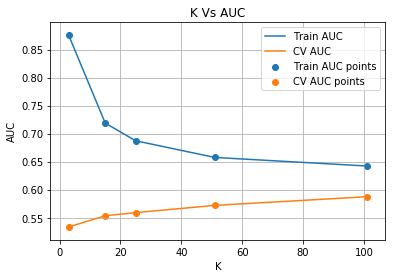

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.327696,0.084550,26.331125,3.596393,3,{'n_neighbors': 3},0.539057,0.527332,0.533869,0.533420,0.004798,5,0.872292,0.875877,0.879026,0.875732,0.002751
1,0.321088,0.039302,24.986495,2.776121,15,{'n_neighbors': 15},0.555391,0.546260,0.558469,0.553373,0.005184,4,0.723146,0.721766,0.711621,0.718844,0.005138
2,0.432071,0.166391,31.308788,7.407355,25,{'n_neighbors': 25},0.559127,0.555911,0.562071,0.559036,0.002516,3,0.690578,0.688877,0.682206,0.687220,0.003613
3,0.547584,0.026099,32.281013,4.302299,51,{'n_neighbors': 51},0.572604,0.567623,0.575509,0.571912,0.003256,2,0.659611,0.660998,0.651902,0.657504,0.004001
4,0.510614,0.016474,39.386039,0.511138,101,{'n_neighbors': 101},0.587962,0.590593,0.583592,0.587382,0.002887,1,0.643250,0.644475,0.638816,0.642180,0.002431


In [23]:
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[3, 15, 25, 51, 101]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_bow, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("K Vs AUC")
plt.grid()
plt.show()
results.head()

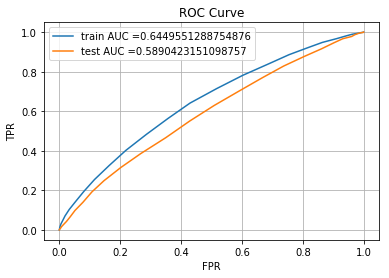

In [24]:
neigh = KNeighborsClassifier(n_neighbors=101, n_jobs=-1)
neigh.fit(X_tr_bow, y_tr)

y_tr_pred = batch_predict(neigh, X_tr_bow)    
y_te_pred = batch_predict(neigh, X_te_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [27]:
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("best threshold:", t)
    print(50*"=")
    return t

def prediction(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [28]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.801980198019802
Test Accuracy Score
0.6083030303030303
Test F1 Score
0.7311228522694181


# KNN (tf-idf Featurization of text features)

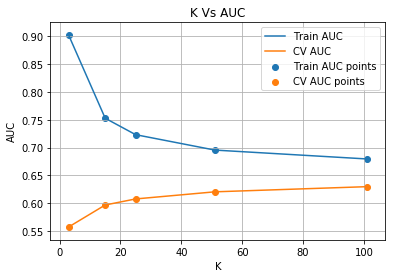

In [32]:
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[3, 15, 25, 51, 101]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_tr)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K")
plt.ylabel("AUC")
plt.title("K Vs AUC")
plt.grid()
plt.show()
results.head()

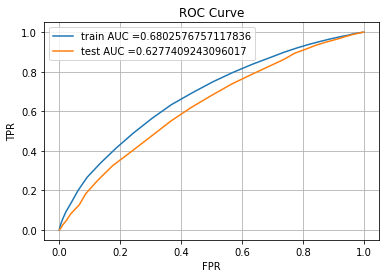

In [33]:
neigh = KNeighborsClassifier(n_neighbors=101, n_jobs=-1)
neigh.fit(X_tr_tfidf, y_tr)

y_tr_pred = batch_predict(neigh, X_tr_tfidf)    
y_te_pred = batch_predict(neigh, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_te, y_te_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [34]:
t = best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test Accuracy Score")
print(accuracy_score(y_te, prediction(y_te_pred, t)))
print(50*"=")

print("Test F1 Score")
print(f1_score(y_te, prediction(y_te_pred, t)))

best threshold: 0.8514851485148515
Test Accuracy Score
0.612
Test F1 Score
0.7300784214520617
